This notebook imports and visualizes data from the testing of the convolutional-deconvolutional network. It allows one to prepare a plot showing, side by side, the satellite data (feature), the height reference data (label) and the network prediction.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio

We create some test data to do some test plots.

In [2]:
x, y = np.meshgrid(np.linspace(0, 500, 500), np.linspace(0, 500, 500))

In [3]:
z1 = 100*np.exp(-0.0001*((x-150)**2 + (y-150)**2))

In [4]:
znoise = np.random.normal(0, 10, z1.shape)
z2 = z1 + znoise

The plot_heightmap() function plots the test data using Matplotlib

In [5]:
def plot_heightmap(x, y, z, title=''):

    fig, ax = plt.subplots()

    c = ax.pcolormesh(x, y, z, cmap='Spectral', vmin=0, vmax=np.abs(z).max())
    ax.set_title(title)
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    fig.colorbar(c, ax=ax)

    plt.show()

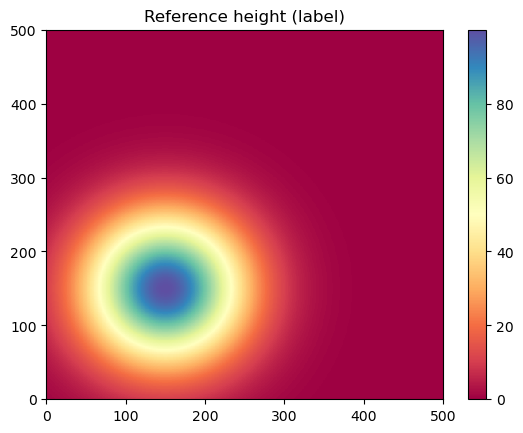

In [6]:
plot_heightmap(x, y, z1, 'Reference height (label)')

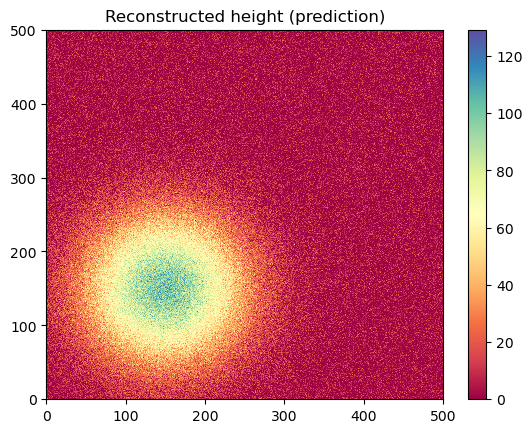

In [7]:
plot_heightmap(x, y, z2, 'Reconstructed height (prediction)')

Now we combine two plots side-by-side

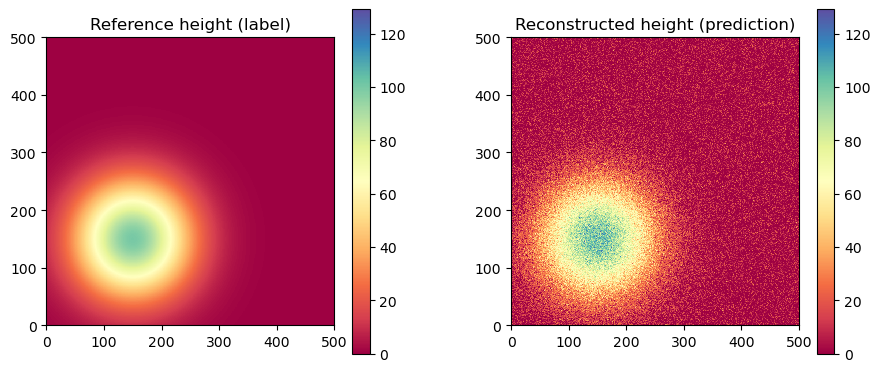

In [8]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

global_vmax = max(np.abs(z1).max(), np.abs(z2).max())

c1 = ax1.pcolormesh(x, y, z1, cmap='Spectral', vmin=0, vmax=global_vmax)
ax1.set_title('Reference height (label)')
ax1.axis([x.min(), x.max(), y.min(), y.max()])
ax1.set_aspect(1.0, adjustable='box')
fig.colorbar(c1, ax=ax1, shrink=0.4)

c2 = ax2.pcolormesh(x, y, z2, cmap='Spectral', vmin=0, vmax=global_vmax)
ax2.set_title('Reconstructed height (prediction)')
ax2.axis([x.min(), x.max(), y.min(), y.max()])
ax2.set_aspect(1.0, adjustable='box')
fig.colorbar(c2, ax=ax2, shrink=0.4)

fig.tight_layout(pad=5)

Finally we combine a figure with two heightmaps...

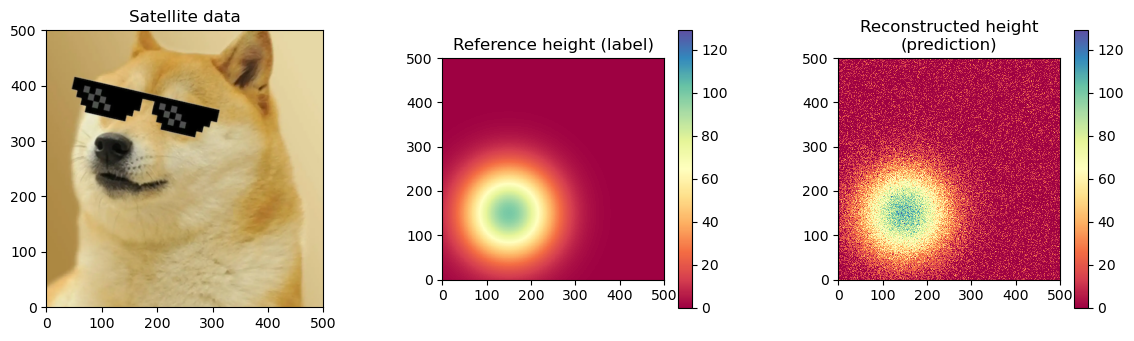

In [16]:
fig, [ax0, ax1, ax2] = plt.subplots(nrows=1, ncols=3, figsize=(12.5, 12.5))

c0 = ax0.imshow(np.flipud(plt.imread('doge.png')))
ax0.set_title('Satellite data')
ax0.axis([0,500,0,500])
ax0.set_aspect(1.0, adjustable='box')

global_vmax = max(np.abs(z1).max(), np.abs(z2).max())

c1 = ax1.pcolormesh(x, y, z1, cmap='Spectral', vmin=0, vmax=global_vmax)
ax1.set_title('Reference height (label)')
ax1.axis([x.min(), x.max(), y.min(), y.max()])
ax1.set_aspect(1.0, adjustable='box')
fig.colorbar(c1, ax=ax1, shrink=0.25)

c2 = ax2.pcolormesh(x, y, z2, cmap='Spectral', vmin=0, vmax=global_vmax)
ax2.set_title('Reconstructed height\n(prediction)')
ax2.axis([x.min(), x.max(), y.min(), y.max()])
ax2.set_aspect(1.0, adjustable='box')
fig.colorbar(c2, ax=ax2, shrink=0.25)

fig.tight_layout(pad=5)

...and we use this layout to plot side-by-side satellite, height reference data and predictions.

In [10]:
def plot_three(satellite_image, ground_truth, prediction, scalefac=1.0):
    
    z1 = imageio.v2.imread(ground_truth)
    z2 = np.load(prediction)
    
    fig, [ax0, ax1, ax2] = plt.subplots(nrows=1, ncols=3, figsize=(12.5, 12.5))

    c0 = ax0.imshow(plt.imread(satellite_image))
    ax0.set_title('Satellite data (feature)')
    ax0.axis([0,500,0,500])
    ax0.set_aspect(1.0, adjustable='box')

    global_vmax = max(np.abs(z1).max(), np.abs(z2).max())

    c1 = ax1.pcolormesh(x, y, z1, cmap='Spectral', vmin=0, vmax=global_vmax)
    ax1.set_title('Reference height (label)')
    ax1.axis([x.min(), x.max(), y.min(), y.max()])
    ax1.set_aspect(1.0, adjustable='box')
    fig.colorbar(c1, ax=ax1, shrink=0.25)

    c2 = ax2.pcolormesh(x, y, scalefac*z2, cmap='Spectral', vmin=0, vmax=global_vmax)
    ax2.set_title('Reconstructed height\n(prediction)')
    ax2.axis([x.min(), x.max(), y.min(), y.max()])
    ax2.set_aspect(1.0, adjustable='box')
    fig.colorbar(c2, ax=ax2, shrink=0.25)

    fig.tight_layout(pad=5)

In [22]:
prefix = '../../data/external/imele_test0/'

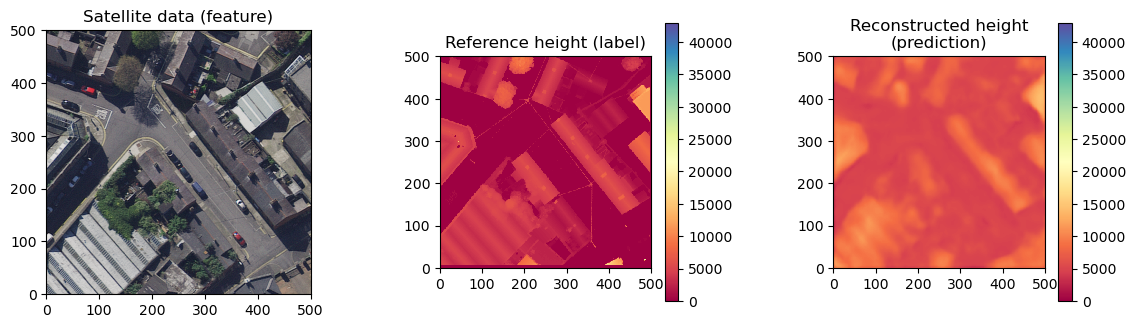

In [23]:
plot_three(prefix + 'test0_rgbs/01.tif', prefix + 'test0_heights/01.png', 'img0.out.npy', 100000)

plt.savefig('panel01.png', transparent=True, bbox_inches='tight')

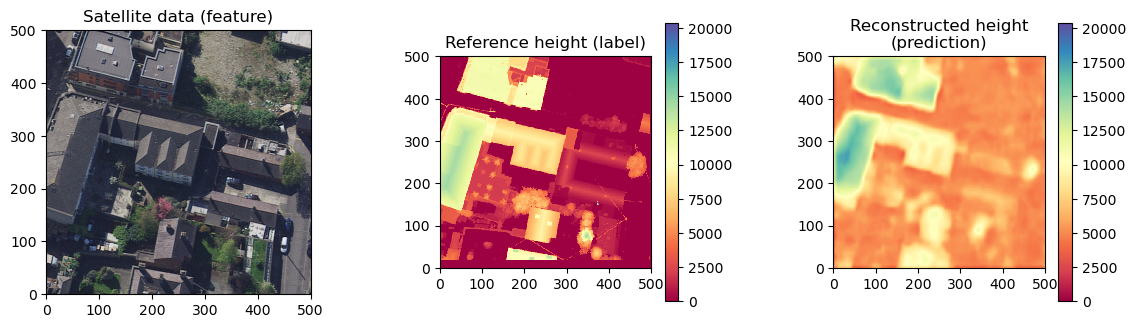

In [25]:
plot_three(prefix + 'test0_rgbs/02.tif', prefix + 'test0_heights/02.png', 'img1.out.npy', 100000)

plt.savefig('panel02.png', transparent=True, bbox_inches='tight')

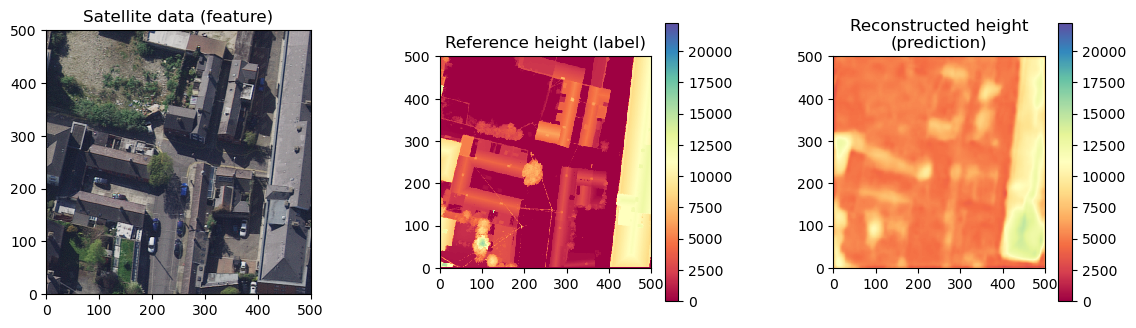

In [26]:
plot_three(prefix + 'test0_rgbs/03.tif', prefix + 'test0_heights/03.png', 'img2.out.npy', 100000)

plt.savefig('panel03.png', transparent=True, bbox_inches='tight')